# Construct crypto data

## Overview

This notebook is used to make some deeper analysis on the constracted dataset using the `dataset_construction.py` script.  

## Requirements

### Conda env

To execute the following script a conda environment is necessary. It is possible to use the `crypto_anomalies.yaml` file in the `conda` fodler as:

```
cd conda
conda env create -f crypto_anomalies.yaml
conda activate crypto_anomalies
```

### Code execution

In order to be able to execute this notebook is necessary to first execute the `dataset_construction.py` script. Indeed, with that script all the processed .csv files for each crypto will be saved in the right folder.  

In [1]:
# Import the necessary libraries
import argparse
import pandas as pd
from typing import List
import sys
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

In [2]:
pd.set_option('display.max_rows', None)  # Display all rows

In [3]:
# Set Seaborn style for better aesthetics
sns.set(style='whitegrid')

For the test analysis information will be taken from the `data/processed` folder. Please if you do not have already execute the `dataset_construction.py` script please execute it. It is possible to find additional details in the script itself. 

### Line Plot
First let's create a line plot to show the trend for the classes (normal, upward anomaly, downward anomaly)

In [4]:
# Read the full data file 
df = pd.read_csv('../data/processed/full_data.csv')

# Convert the 'Datetime' or 'Date' column to datetime if not already
if 'Datetime' in df.columns:
    df['Datetime'] = pd.to_datetime(df['Datetime'])
elif 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'])
else:
    raise ValueError("No 'Datetime' or 'Date' column found in the data.")

# remove all the rows with missing values
df = df.dropna()

# Display the first few rows
df.head()

,Ticker,level_1,Datetime,Open,High,Low,Close,Adj Close,Volume,Price_Variation,Anomaly
1,BTC,1,2024-01-01 01:00:00+00:00,42471.402344,42718.710938,42433.785156,42622.898438,42622.898438,200035328,0.342877,0
2,BTC,2,2024-01-01 02:00:00+00:00,42611.335938,42611.335938,42506.359375,42576.601562,42576.601562,0,-0.108620,0
3,BTC,3,2024-01-01 03:00:00+00:00,42575.968750,42581.007812,42270.757812,42320.730469,42320.730469,118417408,-0.600966,0
4,BTC,4,2024-01-01 04:00:00+00:00,42325.042969,42387.164062,42227.984375,42387.164062,42387.164062,34720768,0.156976,0
5,BTC,5,2024-01-01 05:00:00+00:00,42381.851562,42396.535156,42217.109375,42225.484375,42225.484375,39962624,-0.381435,0


C:\Users\Mauro Andretta\AppData\Local\Temp\ipykernel_20248\3018064404.py:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  monthly_data = df.groupby([df['Datetime'].dt.to_period('M'), 'Anomaly']).size().unstack(fill_value=0)


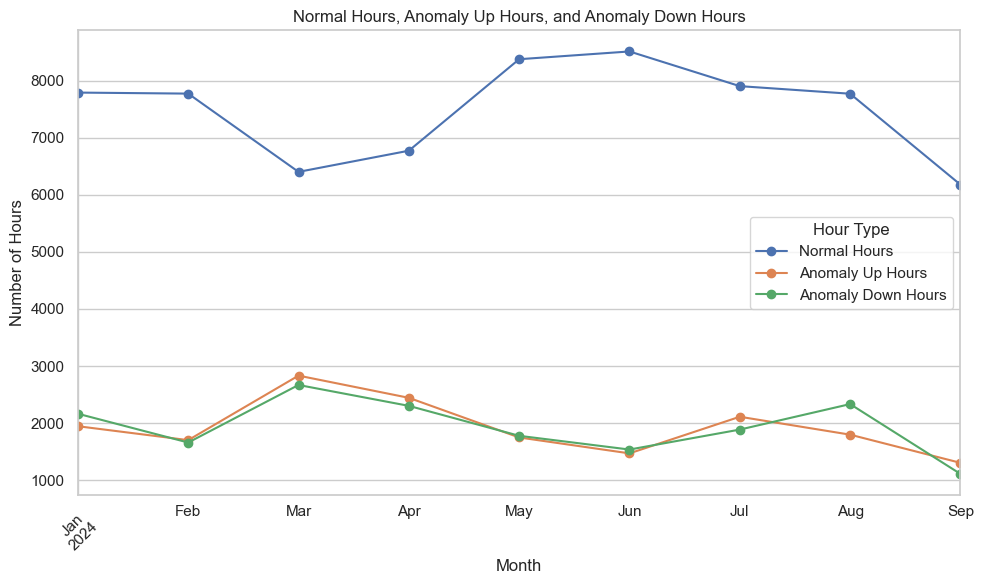

In [5]:
# Convert Datetime column to datetime type
df['Datetime'] = pd.to_datetime(df['Datetime'])

# Group data by month and count occurrences of each anomaly type
monthly_data = df.groupby([df['Datetime'].dt.to_period('M'), 'Anomaly']).size().unstack(fill_value=0)

# Rename columns for clarity
monthly_data.columns = ['Normal Hours', 'Anomaly Up Hours', 'Anomaly Down Hours']

# Plot the data
plt.figure(figsize=(10, 6))
monthly_data.plot(kind='line', marker='o', ax=plt.gca())
plt.title('Normal Hours, Anomaly Up Hours, and Anomaly Down Hours')
plt.xlabel('Month')
plt.ylabel('Number of Hours')
plt.legend(title='Hour Type')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Let's create also a version of the `full_data.csv` in which the curve shifting has not been applied, loaded from the `data/raw` folder. Please run the `src/dataset_acquisition.py` script to get `full_data.csv` in the `data/raw` folder.

In [6]:
def label_anomalies(df, threshold=1.0):
    """
    Label anomalies based on the price variation thresholds.

    Parameters:
    df (pandas.DataFrame): DataFrame containing the cryptocurrency data with 'Price_Variation' column.
    threshold (float): The percentage threshold to consider for anomalies.

    Returns:
    pandas.DataFrame: DataFrame with an additional 'Anomaly' column.
    """
    df = df.copy()

    df['Price_Variation'] = df['Close'].pct_change() * 100
    
    df['Anomaly'] = 0  # Initialize anomaly column with 0 (stable)

    # Identify upward anomalies
    upward_anomalies = df['Price_Variation'].shift(-1) > threshold
    df.loc[upward_anomalies, 'Anomaly'] = 1  # Label previous hour as upward anomaly

    # Identify downward anomalies
    downward_anomalies = df['Price_Variation'].shift(-1) < -threshold
    df.loc[downward_anomalies, 'Anomaly'] = 2  # Label previous hour as downward anomaly

    return df

In [7]:
# Read the full data file 
df_before = pd.read_csv('../data/raw/full_data.csv')

# Apply the function to label anomalies
df_before_shift = label_anomalies(df_before)

# Convert the 'Datetime' or 'Date' column to datetime if not already
if 'Datetime' in df.columns:
    df_before_shift['Datetime'] = pd.to_datetime(df_before_shift['Datetime'])
elif 'Date' in df.columns:
    df_before_shift['Date'] = pd.to_datetime(df_before_shift['Date'])
else:
    raise ValueError("No 'Datetime' or 'Date' column found in the data.")

# remove all the rows with missing values
df_before_shift = df_before_shift.dropna()

# Display the first few rows
df_before_shift.head()

,Ticker,level_1,Datetime,Open,High,Low,Close,Adj Close,Volume,Price_Variation,Anomaly
1,BTC,1,2024-01-01 01:00:00+00:00,42471.402344,42718.710938,42433.785156,42622.898438,42622.898438,200035328,0.342877,0
2,BTC,2,2024-01-01 02:00:00+00:00,42611.335938,42611.335938,42506.359375,42576.601562,42576.601562,0,-0.108620,0
3,BTC,3,2024-01-01 03:00:00+00:00,42575.968750,42581.007812,42270.757812,42320.730469,42320.730469,118417408,-0.600966,0
4,BTC,4,2024-01-01 04:00:00+00:00,42325.042969,42387.164062,42227.984375,42387.164062,42387.164062,34720768,0.156976,0
5,BTC,5,2024-01-01 05:00:00+00:00,42381.851562,42396.535156,42217.109375,42225.484375,42225.484375,39962624,-0.381435,0


C:\Users\Mauro Andretta\AppData\Local\Temp\ipykernel_20248\2236551879.py:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  monthly_data = df_before_shift.groupby([df_before_shift['Datetime'].dt.to_period('M'), 'Anomaly']).size().unstack(fill_value=0)


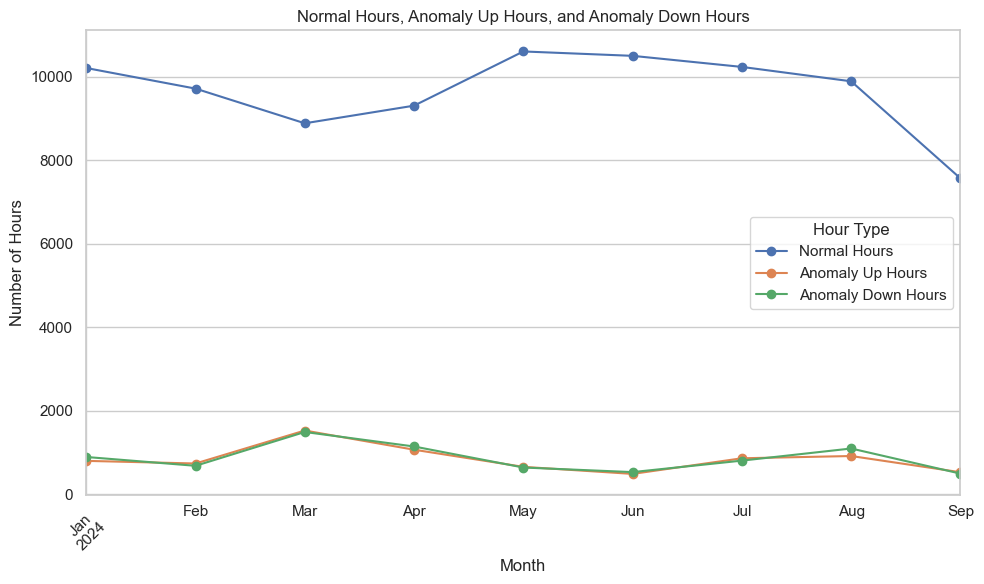

In [8]:
# Convert Datetime column to datetime type
df_before_shift['Datetime'] = pd.to_datetime(df_before_shift['Datetime'])

# Group data by month and count occurrences of each anomaly type
monthly_data = df_before_shift.groupby([df_before_shift['Datetime'].dt.to_period('M'), 'Anomaly']).size().unstack(fill_value=0)

# Rename columns for clarity
monthly_data.columns = ['Normal Hours', 'Anomaly Up Hours', 'Anomaly Down Hours']

# Plot the data
plt.figure(figsize=(10, 6))
monthly_data.plot(kind='line', marker='o', ax=plt.gca())
plt.title('Normal Hours, Anomaly Up Hours, and Anomaly Down Hours')
plt.xlabel('Month')
plt.ylabel('Number of Hours')
plt.legend(title='Hour Type')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Bar plot
Now let's use a Bar Plot for the class distribution After the Curve Shifting.

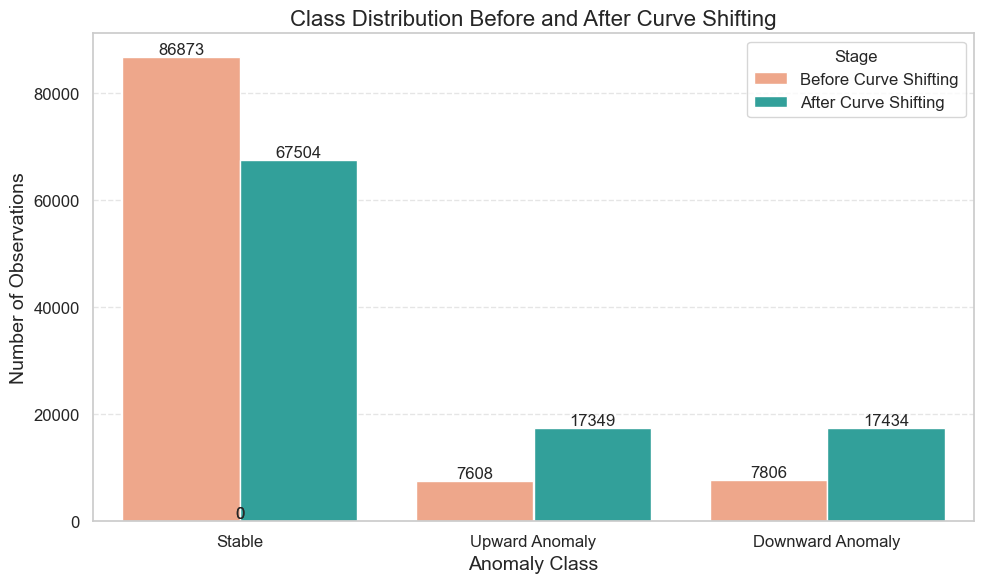

In [9]:
# Count class occurrences before curve shifting
class_counts_before = df_before_shift['Anomaly'].value_counts().sort_index()

# Count class occurrences after curve shifting
class_counts_after = df['Anomaly'].value_counts().sort_index()

# Create a DataFrame for plotting
class_distribution = pd.DataFrame({
    'Class': ['Stable', 'Upward Anomaly', 'Downward Anomaly'],
    'Before Curve Shifting': class_counts_before.values,
    'After Curve Shifting': class_counts_after.values
})

# Melt the DataFrame for seaborn
class_distribution_melted = class_distribution.melt(id_vars='Class', var_name='Stage', value_name='Count')


# Set up the figure
plt.figure(figsize=(10, 6))

# Create a bar plot with custom colors
palette = {'Before Curve Shifting': '#FFA07A', 'After Curve Shifting': '#20B2AA'}
sns.barplot(data=class_distribution_melted, x='Class', y='Count', hue='Stage', palette=palette)

# Customize the plot
plt.title('Class Distribution Before and After Curve Shifting', fontsize=16)
plt.xlabel('Anomaly Class', fontsize=14)
plt.ylabel('Number of Observations', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Stage', fontsize=12, title_fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()

# Annotate the bars with counts
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                       ha='center', va='bottom', fontsize=12)

# Show the plot
plt.show()
